In [1]:
### Name: Tina Lin

Goal: build a simple CNN to detect a *smile* in an image

In [2]:
### build a sequential model using Keras 

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import layers

model = Sequential()

# The first layer: a convolutional layer. Use Conv2D with  32  filters, kernel size  (3,3)  and relu as activation. 
# Here we want input shape to be  (32×32×1). 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))

# The second layer is the same as the first one, except that we don't need to specify input shape here.
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# The third layer is MaxPooling2D layer with pool_size to be  (2,2).
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
          
# The fouth layer is *Dropout* layer with dropout rate 0.25.
model.add(layers.Dropout(0.25))
          
# The fifth layer: Then we need a *Flatten* layer to change the shape of features.
model.add(layers.Flatten())

# The sixth layer: Then a *Dense* layer with output dimension $128$ and *relu* as the activation.
model.add(layers.Dense(128, activation='relu'))

# The seventh layer: Then a *Dropout* layer with dropout rate 0.5.
model.add(layers.Dropout(0.5))
          
# The final layer: Finally a *Dense* layer with output dimension $2$, which are the labels, and *relu* as the activation.     
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [3]:
### Train the model 
import numpy as np

# load the data
X = np.load('X.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
y = np.load('y.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

num1 = 0 
num0 = 0
for i in y:
    if (i[0] == 1):
        num1+=1
    else:
        num0+=1

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
class_weight = [1/(num0/(num0+num1)), 1/(num1/(num0+num1))]
from numpy.random import seed
seed(1)
history = model.fit(X, y,
                    batch_size=128, 
                    epochs=5, 
                    validation_split=0.1, 
                    class_weight=class_weight, 
                    verbose=1)

Shape of X: (13165, 32, 32, 1)
Shape of y: (13165, 2)
Train on 11848 samples, validate on 1317 samples
Epoch 1/5
11848/11848 [==============================] - 3s 263us/step - loss: 0.4910 - acc: 0.7555 - val_loss: 0.3502 - val_acc: 0.8656
Epoch 2/5
11848/11848 [==============================] - 1s 103us/step - loss: 0.3481 - acc: 0.8520 - val_loss: 0.3104 - val_acc: 0.8793
Epoch 3/5
11848/11848 [==============================] - 1s 103us/step - loss: 0.3172 - acc: 0.8796 - val_loss: 0.2873 - val_acc: 0.8838
Epoch 4/5
11848/11848 [==============================] - 1s 103us/step - loss: 0.2899 - acc: 0.8858 - val_loss: 0.2714 - val_acc: 0.8929
Epoch 5/5
11848/11848 [==============================] - 1s 103us/step - loss: 0.2739 - acc: 0.8940 - val_loss: 0.2544 - val_acc: 0.8975


Part 3. (20 points) Use the history data in model to see the accuracy and loss curves (in a single figure) for both training and validation data. https://keras.io/visualization/#training-history-visualization

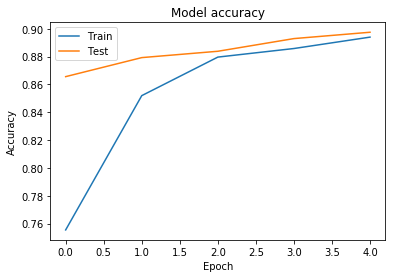

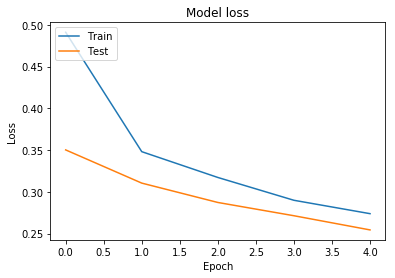

In [4]:
### visualize the accuracy and loss curves for both training and validation data

%matplotlib inline
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [5]:
# The first layer: a convolutional layer. Use Conv2D with  32  filters, kernel size  (3,3)  and relu as activation. 
# Here we want input shape to be  (32×32×1). 
n_model = Sequential()
n_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))

# The second layer is the same as the first one, except that we don't need to specify input shape here.
n_model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# The third layer is MaxPooling2D layer with pool_size to be  (2,2).
n_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
          
# The fifth layer: Then we need a *Flatten* layer to change the shape of features.
n_model.add(layers.Flatten())

# The sixth layer: Then a *Dense* layer with output dimension $128$ and *relu* as the activation.
n_model.add(layers.Dense(128, activation='relu'))

# The seventh layer: Then a *Dropout* layer with dropout rate 0.5.
n_model.add(layers.Dropout(0.5))
          
# The final layer: Finally a *Dense* layer with output dimension $2$, which are the labels, and *relu* as the activation.     
n_model.add(layers.Dense(2, activation='softmax'))

n_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total para

In [6]:
# compile the model
from keras import optimizers
n_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model
history = n_model.fit(X,y, 
                    batch_size=128, 
                    epochs=5, 
                    validation_split=0.1, 
                    class_weight=class_weight, 
                    verbose=1)

Train on 11848 samples, validate on 1317 samples
Epoch 1/5
11848/11848 [==============================] - 2s 132us/step - loss: 0.5081 - acc: 0.7483 - val_loss: 0.3599 - val_acc: 0.8451
Epoch 2/5
11848/11848 [==============================] - 1s 97us/step - loss: 0.3480 - acc: 0.8549 - val_loss: 0.3119 - val_acc: 0.8740
Epoch 3/5
11848/11848 [==============================] - 1s 98us/step - loss: 0.3069 - acc: 0.8762 - val_loss: 0.2885 - val_acc: 0.8838
Epoch 4/5
11848/11848 [==============================] - 1s 97us/step - loss: 0.2898 - acc: 0.8882 - val_loss: 0.2864 - val_acc: 0.8808
Epoch 5/5
11848/11848 [==============================] - 1s 97us/step - loss: 0.2661 - acc: 0.8985 - val_loss: 0.2590 - val_acc: 0.8937


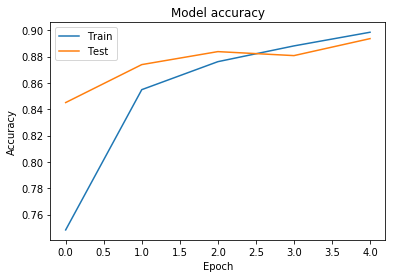

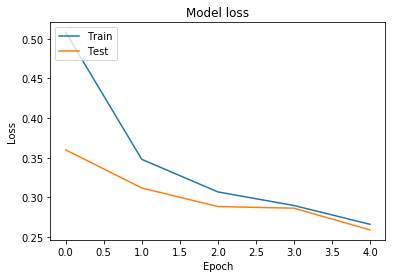

In [7]:
### Visualize the accuracy and loss curves for both training and validation data
%matplotlib inline
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[0.07546786 0.9245321 ]
Neutral ----------------------------------------------###---- Smiling


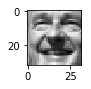

In [8]:
import numpy as np
def print_indicator(data, model, class_names, bar_width=50):
    plt.figure(figsize=(1,1))
    plt.imshow(255 * data[:,:,0],cmap='gray')
    probabilities = model.predict(np.array([data]))[0]
    print(probabilities)
    left_count = int(probabilities[1] * bar_width)
    right_count = bar_width - left_count
    left_side = '-' * left_count
    right_side = '-' * right_count
    print(class_names[0], left_side + '###' + right_side, class_names[1])

from matplotlib import pyplot as plt

img = X[-7] #you can change this to see some other test examples.
print_indicator(img, n_model, ['Neutral', 'Smiling'])


Visualized what your convnet learned using heatmaps  to show which features it learned in order to do smile detection.

In [9]:
from keras.preprocessing import image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 32, 32, 1)


In [10]:
from keras import models

# Extracts the outputs of the top 4 layers:
layer_outputs = [layer.output for layer in model.layers[:4]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
activations = activation_model.predict(img_tensor)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in true_divide


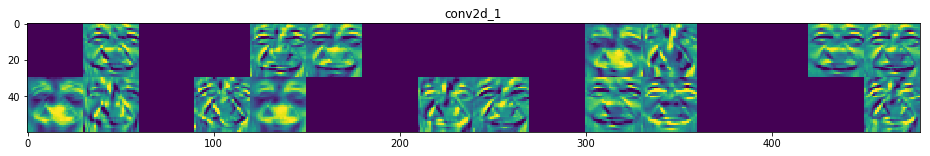

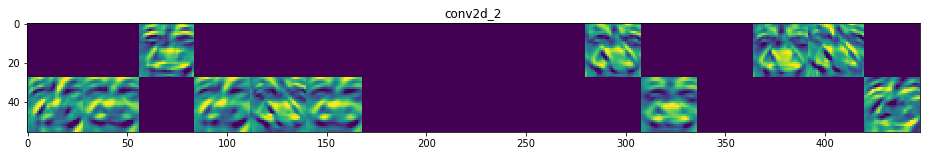

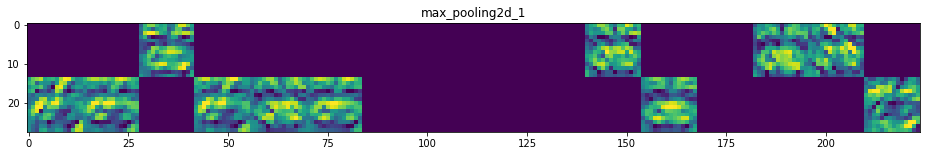

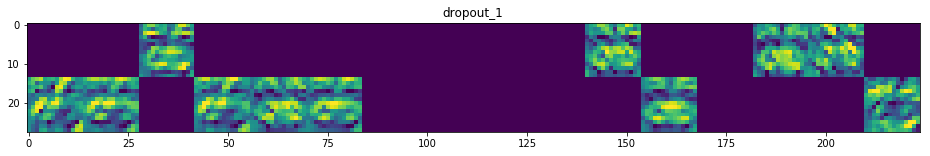

In [12]:
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()